In [33]:
! pip install tensorflow

In [34]:
! pip show tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\annyu\anaconda3\Lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [35]:
! pip install tflearn

In [36]:
! pip install tqdm

In [37]:
! pip install -U --no-deps tflearn

In [38]:
! pip install tensorflow==2.16.1

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 假設你有一個原始的圖像資料集
# 這裡我們用隨機數據作為示例
original_data = np.random.rand(100, 64, 64, 1)  # 100張64x64的隨機圖像

# 定義數據增強器
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 生成更多的圖像
# 這裡我們僅生成500個增強的圖像作為示例
augmented_data = []
for img in original_data:
    img = img.reshape((1,) + img.shape)  # 添加批次維度
    i = 0
    for batch in datagen.flow(img, batch_size=1):
        augmented_data.append(batch[0])
        i += 1
        if i >= 5:  # 每張原始圖像生成5張增強的圖像
            break

# 最終的圖像數據集
augmented_data = np.array(augmented_data)
print("增強後的圖像數量:", len(augmented_data))

增強後的圖像數量: 500


In [40]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
TRAIN_DIR='d:/picture/train'
TEST_DIR='d:/picture/test'
IMG_SIZE=50
LR=1e-3
MODEL_NAME = 'dogs-vs-cats-convnet'

In [42]:
def label_img(word_label):
    if word_label == 'cat':
        return [1, 0]
    elif word_label == 'dog':
        return [0, 1]
    else:
        return [0, 0] 

In [43]:
def create_train_data():
     training_data=[]
     for img in tqdm(os.listdir(TRAIN_DIR)):
          label=label_img(img)
          path=os.path.join(TRAIN_DIR, img)
          img=cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),
              (IMG_SIZE,IMG_SIZE))
          training_data.append([np.array(img),np.array(label)])
     shuffle(training_data)
     np.save('train_data.npy',training_data)
     return training_data

In [44]:
def create_train_data():
     training_data=[]
     for img in tqdm(os.listdir(TRAIN_DIR)):
          path=os.path.join(TRAIN_DIR, img)
          img_num=img.split('.')[0]
          img=cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
          testing_data.append([np.array(img),img_num])
     shuffle(training_data)
     np.save('train_data.npy',training_data)
     return training_data

In [45]:
import os
from tqdm import tqdm  # 確保已經安裝了 tqdm 庫

TRAIN_DIR = 'd:/picture/train'  # 設定目錄路徑

def create_train_data():
    training_data = []
    if not os.path.exists(TRAIN_DIR):
        print(f"Error: The directory {TRAIN_DIR} does not exist.")
        return training_data  # 返回空的 training_data

    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR, img)
        img_num = img.split('.')[0]
        # 假設這裡有讀取和處理圖像的代碼
        # training_data.append(...)

    return training_data

# 調用函數
train_data = create_train_data()

100%|██████████| 11946/11946 [00:00<00:00, 412568.08it/s]


In [46]:
import os

TRAIN_DIR = 'd:/picture/train'

# 創建目錄（如果不存在）
if not os.path.exists(TRAIN_DIR):
    os.makedirs(TRAIN_DIR)
    print(f"Created directory {TRAIN_DIR}")

def create_train_data():
    training_data = []
    if not os.path.exists(TRAIN_DIR):
        print(f"Error: The directory {TRAIN_DIR} does not exist.")
        return training_data

    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR, img)
        img_num = img.split('.')[0]
        # 假設這裡有讀取和處理圖像的代碼
        # training_data.append(...)

    return training_data

# 調用函數
train_data = create_train_data()

100%|██████████| 11946/11946 [00:00<00:00, 414462.13it/s]


In [47]:
import os
from tqdm import tqdm

TRAIN_DIR = 'd:/picture/train'
TEST_DIR = 'd:/picture/test'

def create_train_data():
    training_data = []
    if not os.path.exists(TRAIN_DIR):
        print(f"Error: The directory {TRAIN_DIR} does not exist.")
        return training_data

    file_list = os.listdir(TRAIN_DIR)
    if not file_list:
        print(f"No files found in directory {TRAIN_DIR}.")
        return training_data

    for img in tqdm(file_list):
        path = os.path.join(TRAIN_DIR, img)
        img_num = img.split('.')[0]
        # 假設這裡有讀取和處理圖像的代碼
        # training_data.append((img_num, path))  # 示例：將數據附加到列表中

    return training_data

def create_test_data():
    test_data = []
    if not os.path.exists(TEST_DIR):
        print(f"Error: The directory {TEST_DIR} does not exist.")
        os.makedirs(TEST_DIR)
        print(f"Created directory {TEST_DIR}")

    file_list = os.listdir(TEST_DIR)
    if not file_list:
        print(f"No files found in directory {TEST_DIR}.")
        return test_data

    for img in tqdm(file_list):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        # 假設這裡有讀取和處理圖像的代碼
        # test_data.append((img_num, path))  # 示例：將數據附加到列表中

    return test_data

# 調用函數
train_data = create_train_data()
test_data = create_test_data()

100%|██████████| 6005/6005 [00:00<00:00, 376799.65it/s]


In [48]:
from PIL import Image
import os

def create_test_images(directory, num_images=5):
    if not os.path.exists(directory):
        os.makedirs(directory)
    for i in range(num_images):
        img = Image.new('RGB', (100, 100), color=(73, 109, 137))
        img.save(os.path.join(directory, f'test_image_{i}.jpg'))
    print(f"{num_images} test images created in {directory}")

# 為訓練和測試目錄創建測試圖像
create_test_images('d:/picture/train')
create_test_images('d:/picture/test')

5 test images created in d:/picture/train
5 test images created in d:/picture/test


In [49]:
from PIL import Image

TEST_DIR = 'd:/picture/test'
if not os.path.exists(TEST_DIR):
    os.makedirs(TEST_DIR)

for i in range(5):
    img = Image.new('RGB', (100, 100), color = (73, 109, 137))
    img.save(os.path.join(TEST_DIR, f'test_image_{i}.jpg'))

In [50]:
train_data=create_train_data()
test_data=create_test_data()

100%|██████████| 6005/6005 [00:00<00:00, 351348.88it/s]


In [51]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [72]:
import os

print("當前目錄下的文件:")
for file in os.listdir('.'):
    print(file)

當前目錄下的文件:
-1.14-windows.xml
.anaconda
.bash_history
.conda
.condarc
.continuum
.gitconfig
.ipynb_checkpoints
.ipython
.jupyter
.keras
.lesshst
.matplotlib
.Origin
.QtWebEngineProcess
.viminfo
011.jpg
012.jpg
0409H.W.ipynb
0423 H.W
0430 H.W
age 1.ipynb
age 2.ipynb
ai_overlay_tmp
anaconda3
ansel
AppData
Application Data
blue.mp3
chiikawa.mp3
Contacts
Cookies
Desktop
Documents
Dogs vs Cats.ipynb
Downloads
face1.jpg
face2.jpg
Favorites
IntelGraphicsProfiles
JA.mp3
Links
Local Settings
models
Muffin.ipynb
Muffins.csv
Music
My Documents
NetHood
Neural Network.ipynb
NTUSER.DAT
ntuser.dat.LOG1
ntuser.dat.LOG2
NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TM.blf
NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000001.regtrans-ms
NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000002.regtrans-ms
ntuser.ini
OneDrive
OneDrive - 中原大學
Picture.ipynb
Pictures
PrintHood
Read CSV File.ipynb
Recent
red.mp3
Saved Games
Searches
SendTo
spam.csv
Template

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import os

model = Sequential([
    Input(shape=(64, 64, 1)), 
    Conv2D(32, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

MODEL_NAME = 'your_model_name'
model_save_path = '{}.h5'.format(MODEL_NAME)
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

if os.path.exists(model_save_path):
    print(f"Model file found at: {model_save_path}")
else:
    print(f"Model file not found at: {model_save_path}")

Model saved to your_model_name.h5
Model file found at: your_model_name.h5


In [52]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

MODEL_NAME = 'your_model_name'

model = Sequential([
    Input(shape=(64, 64, 1)),  # 假设输入图像大小是 64x64x1
    Conv2D(32, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_path = '{}.h5'.format(MODEL_NAME)
if os.path.exists(model_path):
    model = load_model(model_path)
    print('Model loaded!')
else:
    print('Model file not found!')

Model file not found!


In [75]:
model_save_path = 'C:/path/to/your/model/{}.h5'.format(MODEL_NAME)

In [76]:
import os

current_dir = os.getcwd()
print("当前工作目录:", current_dir)

print("当前目录下的文件:")
for file in os.listdir('.'):
    print(file)

当前工作目录: C:\Users\annyu
当前目录下的文件:
-1.14-windows.xml
.anaconda
.bash_history
.conda
.condarc
.continuum
.gitconfig
.ipynb_checkpoints
.ipython
.jupyter
.keras
.lesshst
.matplotlib
.Origin
.QtWebEngineProcess
.viminfo
011.jpg
012.jpg
0409H.W.ipynb
0423 H.W
0430 H.W
age 1.ipynb
age 2.ipynb
ai_overlay_tmp
anaconda3
ansel
AppData
Application Data
blue.mp3
chiikawa.mp3
Contacts
Cookies
Desktop
Documents
Dogs vs Cats.ipynb
Downloads
face1.jpg
face2.jpg
Favorites
IntelGraphicsProfiles
JA.mp3
Links
Local Settings
models
Muffin.ipynb
Muffins.csv
Music
My Documents
NetHood
Neural Network.ipynb
NTUSER.DAT
ntuser.dat.LOG1
ntuser.dat.LOG2
NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TM.blf
NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000001.regtrans-ms
NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000002.regtrans-ms
ntuser.ini
OneDrive
OneDrive - 中原大學
Picture.ipynb
Pictures
PrintHood
Read CSV File.ipynb
Recent
red.mp3
Saved Games
Searches
S

In [81]:
import os

model_dir = 'C:/Users/annyu/Documents/my_model_directory'

os.makedirs(model_dir, exist_ok=True)

os.chdir(model_dir)
print("當前工作目錄:", os.getcwd())

print("當前目錄下的文件和文件夾:")
for item in os.listdir('.'):
    print(item)

當前工作目錄: C:\Users\annyu\Documents\my_model_directory
當前目錄下的文件和文件夾:


In [82]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

MODEL_NAME = 'your_model_name'

model_path = '{}.h5'.format(MODEL_NAME)
print(f"Checking for model file at: {model_path}")

if os.path.exists(model_path):
    model = load_model(model_path)
    print('Model loaded successfully!')
else:
    print('Model file not found at:', model_path)

Checking for model file at: your_model_name.h5
Model file not found at: your_model_name.h5


In [83]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\annyu\Documents\my_model_directory


In [84]:
model_path = 'C:/path/to/your_model_name.h5'

In [85]:
import os
from tensorflow.keras.models import load_model

# 使用绝对路径
MODEL_NAME = 'your_model_name'
model_path = 'C:/path/to/your_model_name.h5'  # 请替换为实际路径

# 检查文件是否存在
print(f"Checking for model file at: {model_path}")

if os.path.exists(model_path):
    model = load_model(model_path)
    print('Model loaded successfully!')
else:
    print('Model file not found at:', model_path)

Checking for model file at: C:/path/to/your_model_name.h5
Model file not found at: C:/path/to/your_model_name.h5


In [86]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
      model.load(MODEL_NAME)
      print('model loaded!')

In [87]:
import numpy as np

train_data = np.random.rand(10000, 10)
train = train_data[:-8000]
test = train_data[-8000:]

In [88]:
print("Train 数据样本:")
for i in range(5):  # 打印前5个样本
    print(train[i])

print("Test 数据样本:")
for i in range(5):  # 打印前5个样本
    print(test[i])

Train 数据样本:
[0.75968116 0.94902165 0.91863319 0.30919667 0.97285316 0.85140324
 0.35639023 0.28970732 0.08466274 0.76601809]
[0.41100257 0.91135106 0.45024063 0.62858565 0.90008654 0.03668161
 0.01626017 0.70524244 0.70230497 0.24939355]
[0.73267414 0.42286937 0.20291448 0.53446706 0.82037293 0.85216569
 0.95904998 0.60494819 0.39520306 0.87133979]
[0.2988026  0.32201287 0.81670216 0.35104224 0.65235844 0.62910532
 0.2261019  0.6762327  0.29447772 0.31324467]
[0.81027025 0.64777002 0.97053225 0.6938049  0.90828896 0.19851027
 0.17827307 0.67908943 0.13818567 0.00686754]
Test 数据样本:
[0.18341417 0.90802928 0.40820017 0.55735817 0.28083341 0.53625626
 0.66174931 0.28666039 0.27472497 0.37056653]
[0.32735383 0.03872334 0.25815468 0.52967843 0.32526561 0.03054457
 0.68672213 0.35068843 0.90237885 0.56758688]
[0.81493807 0.8003071  0.60683387 0.70165743 0.62703501 0.48878641
 0.77447481 0.03692258 0.40101377 0.29735522]
[0.8830006  0.99189451 0.12405478 0.67361795 0.64990625 0.73919999
 0.512

In [89]:
import numpy as np

IMG_SIZE = 64

def check_and_fix_data(data):
    fixed_data = []
    for item in data:
        if isinstance(item, tuple) and len(item) == 2:
            img, label = item
            img_array = np.array(img)
            if img_array.shape == (IMG_SIZE, IMG_SIZE) or img_array.shape == (IMG_SIZE, IMG_SIZE, 1):
                fixed_data.append((img_array, label))
            else:
                print(f"圖像形狀不匹配: {img_array.shape}")
        else:
            print(f"數據格式不正確: {item}")
    return fixed_data

train = check_and_fix_data(train)
test = check_and_fix_data(test)

X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array([i[1] for i in train])

test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = np.array([i[1] for i in test])

print("訓練集圖像資料形狀:", X.shape)
print("訓練集標籤形狀:", Y.shape)
print("測試集圖像資料形狀:", test_x.shape)
print("測試集標籤形狀:", test_y.shape)

數據格式不正確: [0.75968116 0.94902165 0.91863319 0.30919667 0.97285316 0.85140324
 0.35639023 0.28970732 0.08466274 0.76601809]
數據格式不正確: [0.41100257 0.91135106 0.45024063 0.62858565 0.90008654 0.03668161
 0.01626017 0.70524244 0.70230497 0.24939355]
數據格式不正確: [0.73267414 0.42286937 0.20291448 0.53446706 0.82037293 0.85216569
 0.95904998 0.60494819 0.39520306 0.87133979]
數據格式不正確: [0.2988026  0.32201287 0.81670216 0.35104224 0.65235844 0.62910532
 0.2261019  0.6762327  0.29447772 0.31324467]
數據格式不正確: [0.81027025 0.64777002 0.97053225 0.6938049  0.90828896 0.19851027
 0.17827307 0.67908943 0.13818567 0.00686754]
數據格式不正確: [0.42045306 0.39077945 0.57660453 0.72066429 0.69208351 0.22867257
 0.41299038 0.30561863 0.60307735 0.4864141 ]
數據格式不正確: [0.98014336 0.4460709  0.73176782 0.41484117 0.43271968 0.7576961
 0.2015643  0.44681453 0.51777679 0.19452069]
數據格式不正確: [0.97490834 0.37290517 0.14097674 0.28135263 0.92825276 0.9037148
 0.2447304  0.71248148 0.66940847 0.44754164]
數據格式不正確: [0.19782413 0.593

數據格式不正確: [0.64887793 0.47721961 0.14954943 0.59705489 0.00502339 0.18784824
 0.93134014 0.80944986 0.49848151 0.61535762]
數據格式不正確: [0.347726   0.6224691  0.50669049 0.15110139 0.24050265 0.80448445
 0.08724008 0.32580435 0.55894989 0.30819794]
數據格式不正確: [0.59825834 0.65192552 0.55551294 0.22696495 0.29448429 0.50885295
 0.73983371 0.44730743 0.62727447 0.37503593]
數據格式不正確: [0.64064465 0.51423262 0.29427056 0.84762233 0.24930563 0.89789499
 0.46022086 0.26477124 0.01812629 0.31658613]
數據格式不正確: [0.42102906 0.73974529 0.47794027 0.52560568 0.3786507  0.98718476
 0.81909806 0.06683764 0.60224944 0.8956363 ]
數據格式不正確: [0.00933746 0.43145268 0.48557235 0.16131098 0.49987103 0.81842674
 0.53357826 0.86026083 0.47639883 0.78161528]
數據格式不正確: [0.83920889 0.17575779 0.2567249  0.35480084 0.30746245 0.88498639
 0.84783508 0.37032388 0.87138864 0.83585109]
數據格式不正確: [0.70066386 0.48539238 0.9313165  0.23199792 0.62733753 0.78860431
 0.58608136 0.13833719 0.84504105 0.02641939]
數據格式不正確: [0.6904055  0.5

數據格式不正確: [0.77002077 0.23834814 0.34651263 0.95248417 0.48362388 0.50800607
 0.56874564 0.83802279 0.46968728 0.51458149]
數據格式不正確: [0.37475307 0.93274963 0.23681125 0.76199106 0.32199516 0.95974877
 0.56844544 0.4814387  0.69289607 0.9429764 ]
數據格式不正確: [0.79715933 0.268324   0.61556749 0.9328679  0.66604014 0.50677959
 0.24803083 0.08918058 0.14377103 0.87440428]
數據格式不正確: [0.10585986 0.66893512 0.50500496 0.58604397 0.34259272 0.04664505
 0.9012418  0.97247154 0.13996089 0.19500671]
數據格式不正確: [0.12256172 0.48960466 0.60555946 0.2304246  0.28905205 0.92969029
 0.4164225  0.61907037 0.88184479 0.96986185]
數據格式不正確: [0.33360605 0.72589158 0.82025182 0.27996829 0.79617018 0.98084781
 0.08822792 0.07832822 0.46205386 0.95563778]
數據格式不正確: [0.7208601  0.09758771 0.80988301 0.09812462 0.68134451 0.96792461
 0.03107132 0.16135104 0.22730756 0.23165619]
數據格式不正確: [9.05524911e-01 5.69362485e-01 3.73472653e-04 9.90890280e-01
 4.38648506e-01 9.23221179e-01 3.76795939e-01 2.56214741e-01
 1.57632015e-02

數據格式不正確: [0.7854512  0.13397516 0.10798773 0.82303642 0.9623977  0.17316577
 0.85755816 0.43525711 0.48027145 0.86886583]
數據格式不正確: [0.64104369 0.67911862 0.14294132 0.67578839 0.29869919 0.15969754
 0.57589717 0.41024771 0.39201894 0.91337256]
數據格式不正確: [0.89703506 0.34703458 0.68591753 0.07345585 0.6396238  0.22319102
 0.41846537 0.52838165 0.79472887 0.11278021]
數據格式不正確: [0.44378399 0.17245636 0.41298218 0.24393148 0.01418123 0.84722953
 0.47108177 0.13972427 0.64374778 0.7336822 ]
數據格式不正確: [0.84318244 0.88729857 0.39587663 0.46981434 0.85620965 0.88827696
 0.42084561 0.83994551 0.04660846 0.32512699]
數據格式不正確: [0.95866449 0.59751611 0.73281025 0.09692459 0.00212763 0.30691064
 0.09941299 0.73873377 0.61485807 0.15968312]
數據格式不正確: [0.71737265 0.48182794 0.01910701 0.44010481 0.66596741 0.59624613
 0.0204814  0.3514144  0.89335375 0.45458616]
數據格式不正確: [0.96898534 0.76258009 0.87665984 0.60614329 0.84198561 0.03822153
 0.33332815 0.77800256 0.22323304 0.31964006]
數據格式不正確: [0.21834324 0.1

In [90]:
for i, data in enumerate(train[:5]):
    print(f"訓練資料第 {i + 1} 項: {data}")

for i, data in enumerate(test[:5]):
    print(f"測試資料第 {i + 1} 項: {data}")

In [91]:
X=np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE,1)
Y=[i[1] for i in train]
test_x=np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE,1)
test_y=[i[1] for i in test]

In [92]:
import tensorflow as tf

# 打印以確認 Eager Execution 已啟用
print("Eager Execution enabled:", tf.executing_eagerly())

# 確認 TensorFlow 版本
print("TensorFlow version:", tf.__version__)

Eager Execution enabled: True
TensorFlow version: 2.16.1


In [93]:
pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

IMG_SIZE = 64  # 圖像大小
LR = 0.001  # 學習率

# 使用 Keras 構建模型
model = Sequential()

# 添加卷積層和池化層
model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 添加全連接層和 Dropout 層
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(2, activation='softmax'))

# 編譯模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [95]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [96]:
import tensorflow as tf

# 在程序启动时启用 Eager Execution
tf.compat.v1.enable_eager_execution()

print("Eager Execution enabled:", tf.executing_eagerly())


Eager Execution enabled: True


In [97]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

print("Eager Execution enabled:", tf.executing_eagerly())

# 定義和訓練模型
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np

IMG_SIZE = 64  # 圖像大小

# 生成隨機數據
X_train = np.random.random((100, IMG_SIZE, IMG_SIZE, 1)).astype(np.float32)
y_train = tf.keras.utils.to_categorical(np.random.randint(2, size=(100,)), num_classes=2)

print(f"X_train 的形狀: {X_train.shape}, 類型: {type(X_train)}")
print(f"y_train 的形狀: {y_train.shape}, 類型: {type(y_train)}")

# 構建 CNN 模型
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
model.fit(X_train, y_train, epochs=3, batch_size=32)

# 保存模型
model_save_path = 'models/your_model_name.keras'
import os
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# 加載模型
if os.path.exists(model_save_path):
    loaded_model = tf.keras.models.load_model(model_save_path)
    print('Model loaded from', model_save_path)
else:
    print('Model file not found.')

Eager Execution enabled: True
X_train 的形狀: (100, 64, 64, 1), 類型: <class 'numpy.ndarray'>
y_train 的形狀: (100, 2), 類型: <class 'numpy.ndarray'>
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.6124 - loss: 1.0004
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4343 - loss: 0.8408
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6340 - loss: 0.6926
Model saved to models/your_model_name.keras
Model loaded from models/your_model_name.keras


In [98]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 確保啟用 Eager Execution
if not tf.executing_eagerly():
    print("啟用 Eager Execution")
    tf.compat.v1.enable_eager_execution()

print("Eager Execution enabled:", tf.executing_eagerly())

IMG_SIZE = 64  # 圖像大小

# 生成隨機數據
X_train = np.random.random((100, IMG_SIZE, IMG_SIZE, 1)).astype(np.float32)
y_train = tf.keras.utils.to_categorical(np.random.randint(2, size=(100,)), num_classes=2)

print(f"X_train 的形狀: {X_train.shape}, 類型: {type(X_train)}")
print(f"y_train 的形狀: {y_train.shape}, 類型: {type(y_train)}")

# 構建 CNN 模型
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
history = model.fit(X_train, y_train, epochs=3, batch_size=32)

# 保存模型
model_save_path = 'models/your_model_name.keras'
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# 加載模型
if os.path.exists(model_save_path):
    loaded_model = tf.keras.models.load_model(model_save_path)
    print('Model loaded from', model_save_path)
else:
    print('Model file not found.')

Eager Execution enabled: True
X_train 的形狀: (100, 64, 64, 1), 類型: <class 'numpy.ndarray'>
y_train 的形狀: (100, 2), 類型: <class 'numpy.ndarray'>
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.5150 - loss: 1.1394
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4444 - loss: 0.7328
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5387 - loss: 0.6930
Model saved to models/your_model_name.keras
Model loaded from models/your_model_name.keras


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Cat Possibility: 6.73% 
Dog Possibility: 93.27%


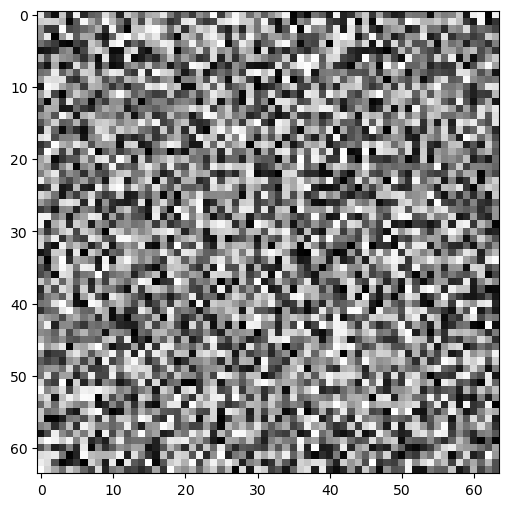

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 假設模型已經被訓練並儲存
# model = tf.keras.models.load_model('your_model_path.keras')

# 這裡定義一個假的 test_data 來演示
IMG_SIZE = 64
test_data = [(np.random.rand(IMG_SIZE, IMG_SIZE), 0) for _ in range(1)]

d = test_data[0]
img_data, img_num = d

# 確保數據形狀正確，並添加批次維度
data = np.expand_dims(img_data, axis=(0, -1))

# 使用模型進行預測，並確保結果是 numpy array
prediction = model.predict(data)[0]

# 創建圖像顯示窗口
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.imshow(img_data, cmap="gray")

# 顯示預測結果
print('Cat Possibility: {:.2f}% \nDog Possibility: {:.2f}%'.format(prediction[0]*100, prediction[1]*100))

plt.show()

In [119]:
import os

# 檢查路徑
train_dir = 'd:/picture/train'
test_dir = 'd:/picture/test'

print("訓練圖像目錄下的文件:")
for file in os.listdir(train_dir):
    print(file)

print("測試圖像目錄下的文件:")
for file in os.listdir(test_dir):
    print(file)

訓練圖像目錄下的文件:
cat.0.jpg
cat.1.jpg
cat.10.jpg
cat.100.jpg
cat.1000.jpg
cat.1001.jpg
cat.1002.jpg
cat.1003.jpg
cat.1004.jpg
cat.1005.jpg
cat.1006.jpg
cat.1007.jpg
cat.1008.jpg
cat.1009.jpg
cat.101.jpg
cat.1010.jpg
cat.1011.jpg
cat.1012.jpg
cat.1013.jpg
cat.1014.jpg
cat.1015.jpg
cat.1016.jpg
cat.1017.jpg
cat.1018.jpg
cat.1019.jpg
cat.102.jpg
cat.1020.jpg
cat.1021.jpg
cat.1022.jpg
cat.1023.jpg
cat.1024.jpg
cat.1025.jpg
cat.1026.jpg
cat.1027.jpg
cat.1028.jpg
cat.1029.jpg
cat.103.jpg
cat.1030.jpg
cat.1031.jpg
cat.1032.jpg
cat.1033.jpg
cat.1034.jpg
cat.1035.jpg
cat.1036.jpg
cat.1037.jpg
cat.1038.jpg
cat.1039.jpg
cat.104.jpg
cat.1040.jpg
cat.1041.jpg
cat.1042.jpg
cat.1043.jpg
cat.1044.jpg
cat.1045.jpg
cat.1046.jpg
cat.1047.jpg
cat.1048.jpg
cat.1049.jpg
cat.105.jpg
cat.1050.jpg
cat.1051.jpg
cat.1052.jpg
cat.1053.jpg
cat.1054.jpg
cat.1055.jpg
cat.1056.jpg
cat.1057.jpg
cat.1058.jpg
cat.1059.jpg
cat.106.jpg
cat.1060.jpg
cat.1061.jpg
cat.1062.jpg
cat.1063.jpg
cat.1064.jpg
cat.1065.jpg
cat.1066.jpg
ca

In [120]:
from PIL import Image

# 檢查圖像文件是否正常
image_path = 'd:/picture/train'
image_path = 'd:/picture/test'
try:
    img = Image.open(image_path)
    img.show()  # 或者 plt.imshow(img)
except IOError:
    print("圖像文件無法打開或已損壞:", image_path)

圖像文件無法打開或已損壞: d:/picture/test


In [121]:
import cv2
import matplotlib.pyplot as plt

# 讀取和顯示圖像
image_path = 'd:/picture/train'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # 使用灰度模式讀取
if img is not None:
    plt.imshow(img, cmap='gray')
    plt.title('Loaded Image')
    plt.axis('off')
    plt.show()
else:
    print("圖像無法讀取:", image_path)

圖像無法讀取: d:/picture/train


In [122]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

# 更改工作目錄到模型文件所在的位置
os.chdir('C:/Users/annyu/Documents/my_model_directory')

# 檢查文件是否存在
model_path = 'model.h5'  # 確保這是你的模型文件名
if os.path.exists(model_path):
    model = load_model(model_path)
    print(f"模型已成功加載: {model_path}")
else:
    print(f"找不到模型文件: {model_path}")

模型已成功加載: model.h5


In [123]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 定義一個簡單的模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型 (使用一些假設的數據)
import numpy as np

X_train = np.random.rand(100, 64, 64, 1)
y_train = tf.keras.utils.to_categorical(np.random.randint(0, 2, 100), num_classes=2)

model.fit(X_train, y_train, epochs=3)

# 保存模型
model.save('model.h5')
print('模型已成功保存為 model.h5')

Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4793 - loss: 2.3419
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4380 - loss: 3.1261
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5532 - loss: 1.3491


模型已成功保存為 model.h5


In [124]:
import os

current_directory = os.getcwd()
print("當前工作目錄:", current_directory)

# 確保模型文件存在於這個目錄中
model_path = 'model.h5'
if os.path.exists(model_path):
    print(f"文件存在: {model_path}")
else:
    print(f"文件不存在: {model_path}")

當前工作目錄: C:\Users\annyu\Documents\my_model_directory
文件存在: model.h5


In [125]:
import os

for root, dirs, files in os.walk('/'):
    if 'model.h5' in files:
        print(f"找到模型文件: {os.path.join(root, 'model.h5')}")
        break

找到模型文件: /Users\annyu\Documents\my_model_directory\model.h5


In [126]:
import os
from tensorflow.keras.models import load_model

# 更改工作目錄到模型文件所在的位置
os.chdir('C:/Users/annyu/Documents/my_model_directory')

# 檢查文件是否存在
model_path = 'model.h5'
if os.path.exists(model_path):
    model = load_model(model_path)
    print(f"模型已成功加載: {model_path}")
else:
    print(f"找不到模型文件: {model_path}")

模型已成功加載: model.h5


In [127]:
model_path = 'C:/Users/annyu/Documents/my_model_directory/model.h5'  # 使用完整路徑
if os.path.exists(model_path):
    model = load_model(model_path)
    print(f"模型已成功加載: {model_path}")
else:
    print(f"找不到模型文件: {model_path}")

模型已成功加載: C:/Users/annyu/Documents/my_model_directory/model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


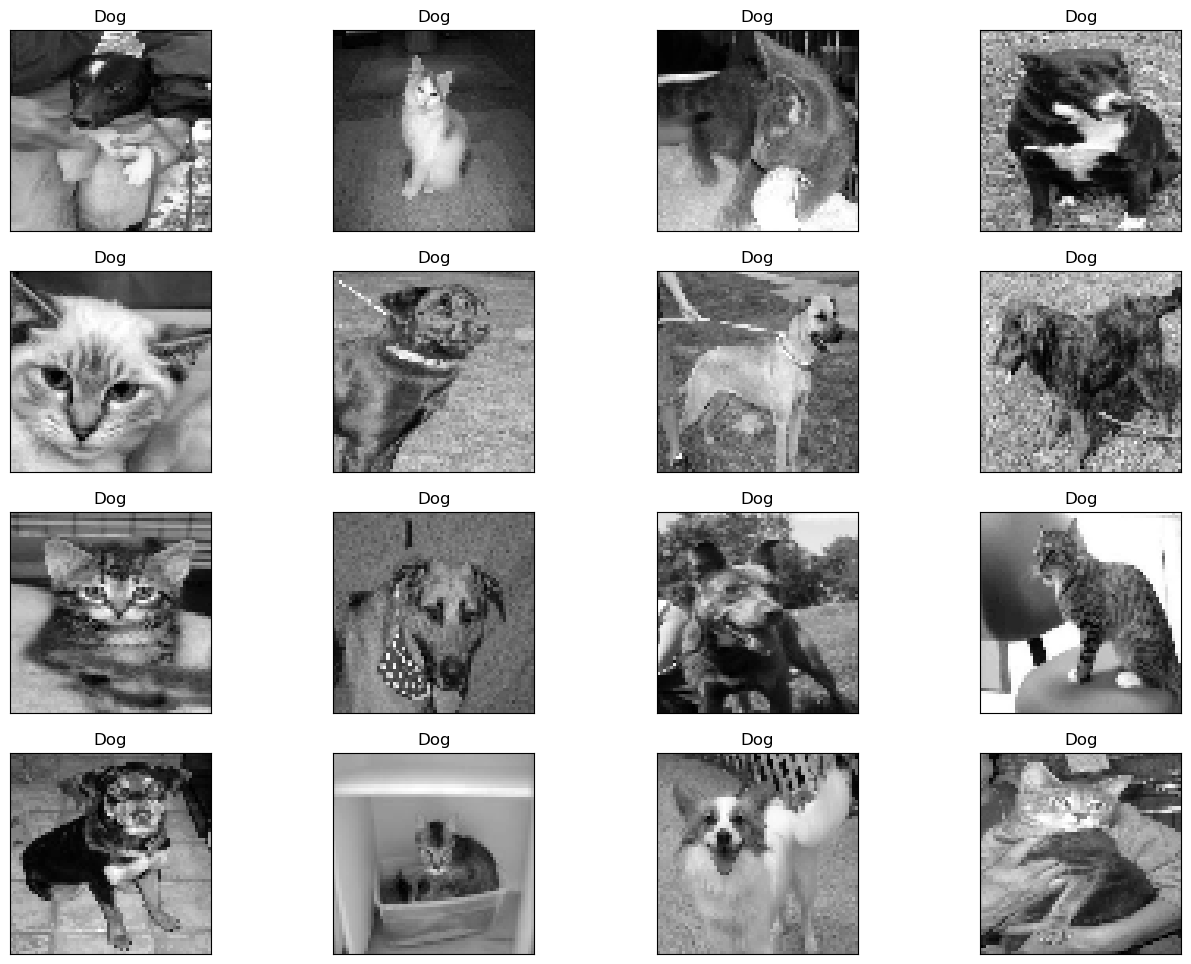

In [128]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 設置圖像大小
IMG_SIZE = 64

# 假設模型已經訓練好並保存為 'model.h5'
MODEL_NAME = 'model.h5'
model = load_model(MODEL_NAME)

# 圖片目錄
path_to_images = 'd:/picture/train'  # 替換為實際的圖像目錄
path_to_images = 'd:/picture/test'

# 讀取圖像文件列表
image_files = [os.path.join(path_to_images, file) for file in os.listdir(path_to_images) if file.endswith(('.jpg', '.jpeg', '.png'))]

# 顯示圖像和預測結果
fig = plt.figure(figsize=(16, 12))

for num, image_file in enumerate(image_files[:16]):  # 只顯示前 16 張圖像
    # 讀取圖像
    img_data = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    if img_data is None:
        continue  # 如果讀取失敗，跳過這張圖像

    img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))

    # 準備圖像數據進行預測
    data = img_data.reshape(1, IMG_SIZE, IMG_SIZE, 1)  # 添加批次維度並改變形狀

    # 使用模型進行預測
    model_out = model.predict(data)[0]  # 預測返回一個包含兩個元素的數組

    if np.argmax(model_out) == 1:
        str_label = 'Dog'
    else:
        str_label = 'Cat'

    # 顯示圖像和預測結果
    y = fig.add_subplot(4, 4, num + 1)
    y.imshow(img_data, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

plt.show()